###               JELILAT OLUWATOSIN ABDULLATEEF
  Data Analyst                                                    
  
  abdullateefjelilat25@gmail.com / www.linkedin.com/in/jelilat     

# DIABETES PATIENT PREDICTION ANALYSIS 

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger dataset. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

# Importing Libraries

In [1]:
#Importing Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Importing libraries for prediction

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

##### Ioading the Dataset

In [3]:
df = pd.read_csv("diabetes.csv")

# Exploratory Data Analysis (EDA)

#### First five rows of the Dataset

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Last five rows of the dataset

In [5]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


#### Overview of the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### Shape of the dataset

In [7]:
df.shape

(768, 9)

#### Available Column names

In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

#### Data type in each column

In [9]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

# Checking for duplicate data

In [10]:
df.duplicated().sum()

0

# Checking for missing values

df.isnull().sum()

<Axes: >

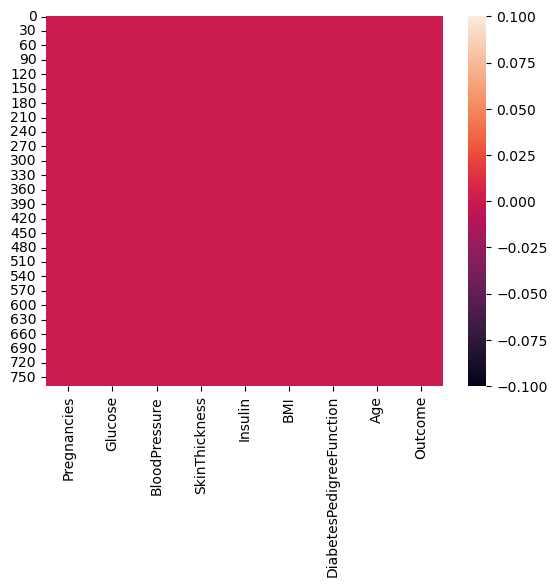

In [11]:
sns.heatmap(df.isnull())

# Correlation Matrix

In [12]:
correlation=df.corr()
print(correlation)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

<function matplotlib.pyplot.show(close=None, block=None)>

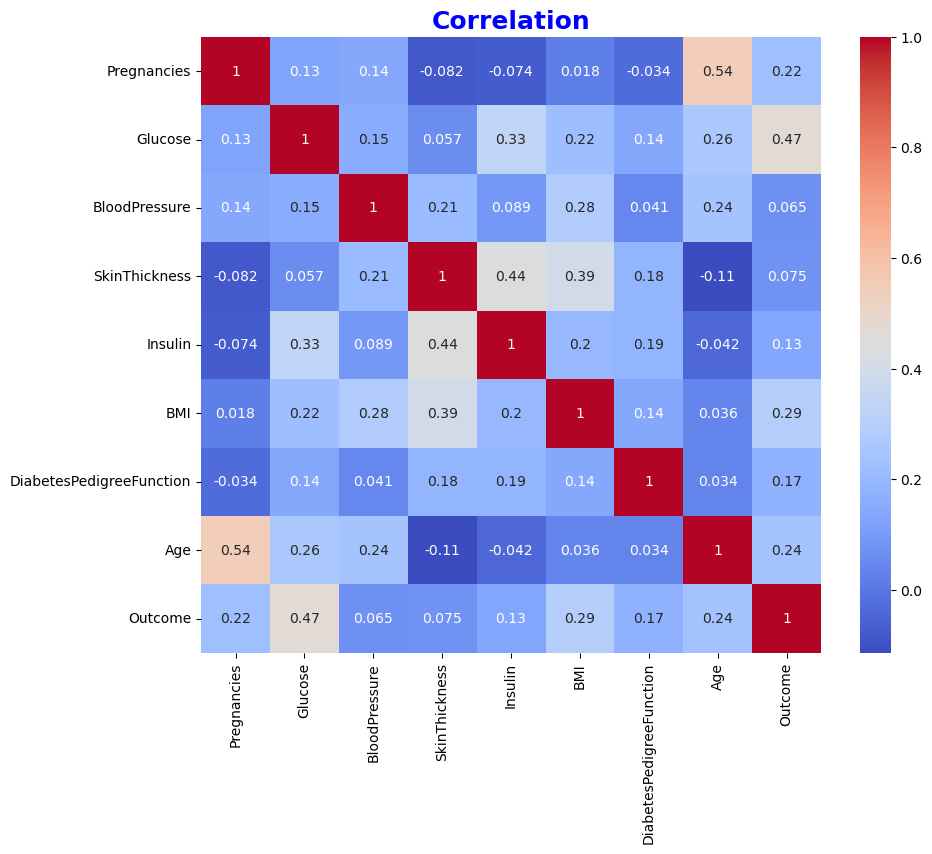

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')
plt.title('Correlation', color = 'blue',fontweight='bold',fontsize=18)

plt.show

# Training the Model with Train Test Split

#### Train test split

Train-test split is a techniques used in machine learning to assess model performance. It divides the dataset into a training set and a testing set, with a 0.2 test size indicating that 20% of the data is used for testing and 80% for training.

In [14]:
x=df.drop("Outcome",axis=1)
y=df['Outcome']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In X all the imdependent variables are stored 
In Y the predictor variable ("Outcome") is stored.


In [15]:
scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.transform(x_test)

print(x_test_scaler.shape,x_train_scaler.shape)

(154, 8) (614, 8)


#### Training the Model

Fitting the x train and y train data into the variable called model.

In [16]:
model=LogisticRegression()
model.fit(x_train_scaler,y_train)

LogisticRegression()

# Making Prediction

In [17]:
prediction = model.predict(x_test_scaler)
print(prediction)

[0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 1 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0]


After training the model, predictions are made using the data, which comprises 20% of the total datasets.

In [18]:
accuracy = accuracy_score(prediction,y_test)
print('Accuracy:-',accuracy)

Accuracy:- 0.7532467532467533


## ACCURACY:- 75.32%
The model predicted the presence or absence of diabetes in approximately 75.32% of the cases in the test set.